$\large{\text{Introducción a la Optimización}}$

$\text{Francisco Albeiro Gómez Jaramillo}$

$\text{Angie Daniela Forero Laiton}$




<center> <h1>${ \text{Tarea 1 - Minimos cuadrados}}$</h1> </center>


$\underline{\textbf{1.}}$  Relacionado con la naturaleza de los datos, qué condiciones deben cumplir las matrices $A$ y $b$ para ser resolubles desde la perspectiva de los mínimos cuadrados.

### <b style = 'color : darkred;'>$Solución:$</b>

Cuando realizamos mínimos cuadrados con el fin de encontrar la solución a algún problema de optimización, se toma un modelo y con el conjunto de observaciones se conforman las matrices $A$ y $b$ para las cuales se quiere minimizar $||Ax-b||_{2}^{2}$.

Luego, al intentar encontrar el $x$ que minimiza dicha distancia, nos encontramos con un problema de la forma: 

$$(A^{T}A)\cdot x=(A^{T})\cdot b$$ 

Es claro que si la matriz es cuadrada, lo primero que se piensa para intentar despejar $x$ de manera analítica, es que se necesita que $A$ sea una matriz no singular (vectores linealmente independientes), esto debido a que se debe garantizar la existencia de $(A^{T}A)^{-1}$, por tanto tomar como hipótesis que $A$ debe ser una matriz invertible facilita la resolución del problema y nos otorga una única respuesta, no obstante, no todas las matrices de observaciones $A$ son cuadradas, por tanto si dicha matriz de tamaño $n\times m$ tiene un rango máximo en sus columnas o filas se utiliza la matriz pseudoinversa de Moore-Penrose, de donde la solución viene dada por la siguiente fórmula:

$$x=A^{+}b \text{ siendo } A^{+}=(A^{T}A)^{-1}A^{T}$$


Pero, ¿que ocurre si la matriz $A$ (cuadrada o no cuadrada) no tiene un rango máximo ni en sus columnas ni en sus filas?, es decir, tenemos una matriz de observaciones con vectores linealmente dependientes, en este caso de igual manera se puede hallar una solución usando la Pseudoinversa de Moore-Penrose, sin embargo,  $A^{+}$ se halla utilizando descomposición en valores singulares, lo cual nos da una posible respuesta $x$ al problema pero no nos garantiza su unicidad.

En conclusión, seriá preferible más no necesario que la matriz $A$ sea inverible para dar solución al problema. En terminos del tiempo de cálculo, una condición que se pide para la matriz $A$ (sobre todo cuando ocurre un exceso de sobredeterminación) es que tenga una cantidad de entradas distintas de $0$  pequeña, para que así el cálculo de la inversa (en el caso invertible) y la pseudoinversa de Moore(en el caso no invertible) sea más rapido y eficiente.

Ahora, para el vector $b$ se debe tener que $b\neq \textbf{0}$ pues si esto ocurriera, claramente el vector $x$ es el vector nulo, igualmente si tenemos un vector $b=\textbf{0}$ lo natural es que la predicción vuelva a ser $0$.


$\underline{\textbf{2.}}$ Utilizar un modelo no lineal de mínimos cuadrados para ajustar el precio del bitcoin y realizar una predicción utilizando el modelo para determinar el precio diario futuro con una semana de antelación, comparar con los valores reales.

### <b style = 'color : darkred;'>$Solución:$</b>


Para realizar la predicción del precio de Bitcoin por una semana, se utilizará un modelo no linear dado por el polinomio  $y=ax^4+bx^3+cx^2+dx+e$, en conjunto con una sucesión de observaciones $\{(x_i,y_i)\}$;  de tal manera que $x_i$ es el día y $y_i$ es el precio del Bitcoin, adicionalmente se utilizará el método de los minimos cuadrados para encontrar las constantes $(a,b,c,d,e)$ que hacen que $y_i=ax_i^4+bx_i^3+cx_i^2+dx_i+e$.

In [66]:
# Paquetes de Julia necesarios para el funcionamiento del codigo:

using CSV
using DataFrames
using Plots
using LinearAlgebra

#Lectura de la Base de Datos:

datosBitcoin= CSV.read("BasesdeDatosBitcoin.csv",DataFrame);
datosBitcoin.Último .= replace.(datosBitcoin.Último, "," => "");
datosBitcoin.ÚltimoFloat = parse.(Float64, datosBitcoin.Último);
DataFrame(datosBitcoin)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.,ÚltimoFloat
,String15,String15,String15,String15,String15,String7,String7,Float64
1,15.03.2022,39.2857,"39.673,0","39.854,7","38.220,9","2,25B","-0,97%",39.2857
2,14.03.2022,39.6711,"37.789,5","39.914,3","37.613,6","2,33B","4,97%",39.6711
3,13.03.2022,37.7924,"38.813,2","39.272,3","37.603,4","1,55B","-2,63%",37.7924
4,12.03.2022,38.8143,"38.730,2","39.355,3","38.666,5","1,11B","0,22%",38.8143
5,11.03.2022,38.7302,"39.422,5","40.177,0","38.236,4","2,79B","-1,74%",38.7302
6,10.03.2022,39.4163,"41.933,9","42.029,1","38.603,5","3,62B","-5,99%",39.4163
7,09.03.2022,41.9290,"38.731,5","42.538,5","38.663,3","3,60B","8,22%",41.929
8,08.03.2022,38.7448,"38.020,6","39.351,5","37.886,6","2,67B","1,89%",38.7448
9,07.03.2022,38.0248,"38.420,6","39.532,0","37.182,1","3,02B","-0,99%",38.0248


Observe que en el anterior DataFrame se encuentran los precios de las últimas fechas en las primeras posiciones, por tanto, para dar una mejor visualización del comportamiento del Bitcoin, nos vemos obligados a invertir el vector, de esta manera el primer día en efecto será el correspondiente al $01$ de Enero y el último al $15$ de marzo.

In [67]:
#Se invierten los datos del vector Último pues el ultimo día se encuentra en la primera fila de la base, adicionalmente
#los datos aparecen multiplicados *10^(-3) pues julia reconoce a "." como separador decimal.

datosBitcoin.ÚltimoFloat=reverse(datosBitcoin.ÚltimoFloat) 

74-element Vector{Float64}:
 47.738
 47.3118
 46.4302
 45.8373
 43.4259
 43.0975
 41.5467
 41.672
 41.8483
 41.8322
 42.7332
 43.901
 42.56
  ⋮
 39.1427
 39.3958
 38.4031
 38.0248
 38.7448
 41.929
 39.4163
 38.7302
 38.8143
 37.7924
 39.6711
 39.2857

$\textbf{Nota:}$ Se realiza una predicción de los valores de la semana en base a observaciones de $3$ meses pues se concidera que entre más datos se tengan apra realizar el procedimiento, la predicción puede ser más acertada.

Veamos cual es el comportamiento inicial de los datos:

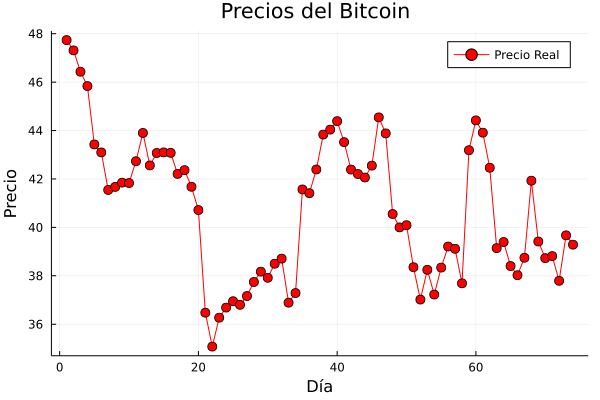

In [68]:
#Se grafican los datos de la base:
plot(datosBitcoin.ÚltimoFloat,color="red",title="Precios del Bitcoin ",marker = (:circle,5), add_marker = true, label="Precio Real",xlabel="Día", ylabel="Precio")

In [69]:
#Se define la matriz de diseño:

N1 = size(datosBitcoin.ÚltimoFloat,1);
A1 = Array((1:N1));
b1 = Array(datosBitcoin.ÚltimoFloat);
A1 = [ones(N1,1) A1 A1.^2 A1.^3 A1.^4]; 
println(A1)
println(A1[:,5])


[1.0 1.0 1.0 1.0 1.0; 1.0 2.0 4.0 8.0 16.0; 1.0 3.0 9.0 27.0 81.0; 1.0 4.0 16.0 64.0 256.0; 1.0 5.0 25.0 125.0 625.0; 1.0 6.0 36.0 216.0 1296.0; 1.0 7.0 49.0 343.0 2401.0; 1.0 8.0 64.0 512.0 4096.0; 1.0 9.0 81.0 729.0 6561.0; 1.0 10.0 100.0 1000.0 10000.0; 1.0 11.0 121.0 1331.0 14641.0; 1.0 12.0 144.0 1728.0 20736.0; 1.0 13.0 169.0 2197.0 28561.0; 1.0 14.0 196.0 2744.0 38416.0; 1.0 15.0 225.0 3375.0 50625.0; 1.0 16.0 256.0 4096.0 65536.0; 1.0 17.0 289.0 4913.0 83521.0; 1.0 18.0 324.0 5832.0 104976.0; 1.0 19.0 361.0 6859.0 130321.0; 1.0 20.0 400.0 8000.0 160000.0; 1.0 21.0 441.0 9261.0 194481.0; 1.0 22.0 484.0 10648.0 234256.0; 1.0 23.0 529.0 12167.0 279841.0; 1.0 24.0 576.0 13824.0 331776.0; 1.0 25.0 625.0 15625.0 390625.0; 1.0 26.0 676.0 17576.0 456976.0; 1.0 27.0 729.0 19683.0 531441.0; 1.0 28.0 784.0 21952.0 614656.0; 1.0 29.0 841.0 24389.0 707281.0; 1.0 30.0 900.0 27000.0 810000.0; 1.0 31.0 961.0 29791.0 923521.0; 1.0 32.0 1024.0 32768.0 1.048576e6; 1.0 33.0 1089.0 35937.0 1.185921

Se gráfica la función objetivo:

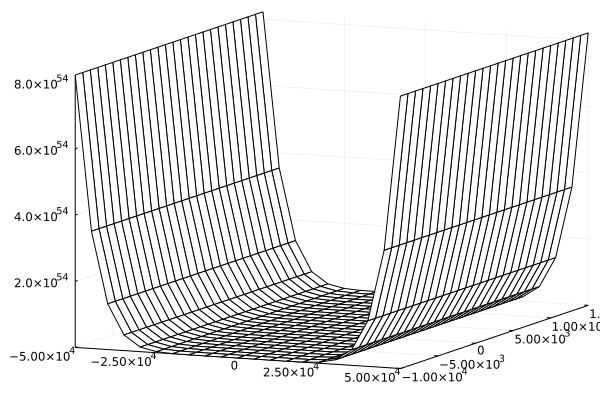

In [70]:
Plots.gr()

function f(x,y) 
    sum((A1[:,5]*x^4+A1[:,4]*x^3+A1[:,3]*x^2+A1[:,2]*x+A1[:,1]*y-b1)*transpose((A1[:,5]*x^4+A1[:,4]*x^3+A1[:,3]*x^2+A1[:,2]*x+A1[:,1]*y-b1)))
end
wireframe(-50000:5000:50000,-10000:1000:15000,f)

Resolvemos el problema usando factorización QR: (multiplicamos por $1000$ pues los datos estan multiplicados por $10^{-3}$)

In [71]:
qrA1 = qr(A1);                    
constantes1 = qrA1\b1

println("[e,d,c,b,a]=",constantes1*1000)

[e,d,c,b,a]=[49308.48928435471, -1098.2871256055473, 41.18923453996077, -0.5953074645910413, 0.00287845437707835]


Finalmente, se representa el ajuste de dicho polinomio en comparación a los datos:

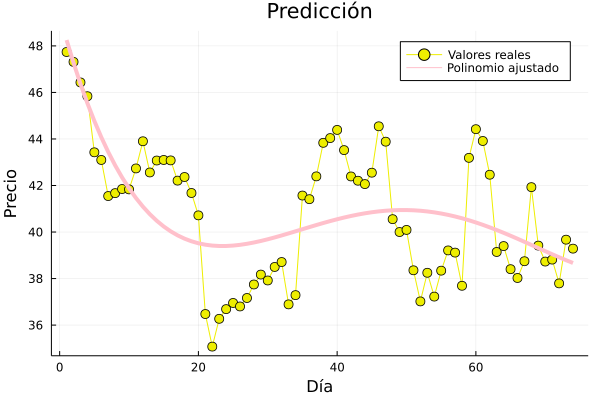

In [72]:
cons1=constantes1

#Función que predice el valor del Bitcoin
function pred(a, b)
    return a*b
end

prediccion1= Array(zeros(74))

for i in range(0,4)
   prediccion1=prediccion1+pred(cons1[i+1],A1[:,2].^i)
end 

#Graficas:

plot(A1[:,2],b1,label="Valores reales",color="yellow2", marker = (:circle,5), add_marker = true,xlabel="Día", ylabel="Precio")
plot!(A1[:,2],prediccion1,color="pink",linewidth=4,label="Polinomio ajustado", title= "Predicción")

Queremos predecir el valor del Bitcoin para los siguientes días al $15$ de Marzo, por tanto al tener $74$ días dentro de nuestra base, para predecir el primer día de la semana, se evalúa el día $75$ en el polinomio, para predecir el segundo día de la semana, se evalúa el día $76$ en el polinomio y así sucesivamente hasta evalúar $81$ en el polinomio (lo cual corresponde al septimo día).

In [73]:
BitcoinSemana=Array(zeros(7))

for i in range(75,81)
   Dia = [float((i)^(j)) for j in range(0,4)]
   Dias= Array(Dia)
   PrecioDia=(transpose(Dias)*constantes1)*1000
   BitcoinSemana[i-74]=PrecioDia
   println("El precio del Bitcoin para el día ",i-74, " es = ", BitcoinSemana[i-74])
end


El precio del Bitcoin para el día 1 es = 38557.15805161709
El precio del Bitcoin para el día 2 es = 38453.49840088785
El precio del Bitcoin para el día 3 es = 38360.27420207778
El precio del Bitcoin para el día 4 es = 38279.198452635734
El precio del Bitcoin para el día 5 es = 38212.053232915496
El precio del Bitcoin para el día 6 es = 38160.689706175894
El precio del Bitcoin para el día 7 es = 38127.02811858091


Para ver que tan efectivas son nuestras predicciones, se comparan con los precios reales del Bitcoin en las mismas fechas, como se puede ver en la siguiente gráfica:

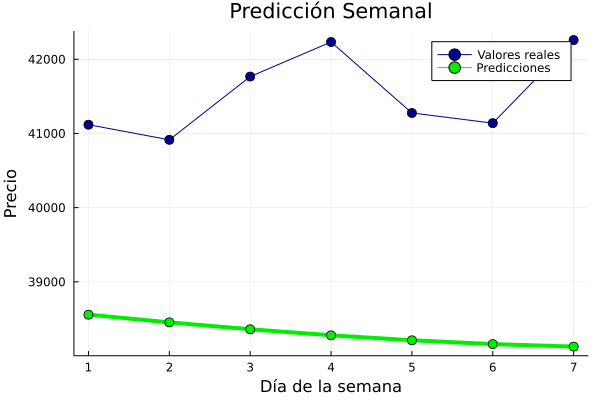

In [74]:
PrecioRealBitcoin=[41.118 , 40.914, 41.767, 42.233, 41.276, 41.139, 42.259]*1000
x=Array(1:7)
plot(PrecioRealBitcoin,label="Valores reales",color="blue4", marker = (:circle,5), add_marker = true,xlabel="Día de la semana", ylabel="Precio")
plot!(BitcoinSemana,color="green2",linewidth=4,label="Predicciones", marker = (:circle,5), add_marker = true, title= "Predicción Semanal")

Para terminar de visualizar la diferencia entre los valores predichos y los valores actuales, observe la siguiente tabla:

In [75]:
Dif=Array(zeros(6))
function rest(n,m)
    rest = n - m
    return rest
end

Dif=rest(PrecioRealBitcoin,BitcoinSemana)

DataFrame("Dia" => x, "Predicción Realizada" => BitcoinSemana,"Precio real" => PrecioRealBitcoin, "Diferencia de Precios" => Dif)

,Dia,Predicción Realizada,Precio real,Diferencia de Precios
,Int64,Float64,Float64,Float64
1,1,38557.2,41118.0,2560.84
2,2,38453.5,40914.0,2460.5
3,3,38360.3,41767.0,3406.73
4,4,38279.2,42233.0,3953.8
5,5,38212.1,41276.0,3063.95
6,6,38160.7,41139.0,2978.31
7,7,38127.0,42259.0,4131.97


En esta se puede ver que la predicción es bastante conservadora, pues se mantiene por debajo de los precios del Bitcoin reales.

Adicionalmente, se puede analizar el comportamiento de la función objetivo con el fin de predecir el valor del Bitcoin con mucho más tiempo de anterioridad, por ejemplo buscar el valor del Bitcoin de un mes, en dicho caso realizaríamos (suponiendo que el mes tiene 30 días).

In [76]:
BitcoinMes=Array(zeros(30))

for i in range(75,104)
   Dia1 = [float((i)^(j)) for j in range(0,4)]
   Dias1= Array(Dia1)
   Precio1Mes=(transpose(Dias1)*constantes1)*1000
   BitcoinMes[i-74]=Precio1Mes
end
println(BitcoinMes)

[38557.15805161709, 38453.49840088785, 38360.27420207778, 38279.198452635734, 38212.053232915496, 38160.689706175894, 38127.02811858091, 38113.05779919949, 38120.83716000565, 38152.49369587847, 38210.22398460203, 38296.29368686554, 38413.03754626319, 38562.859389294295, 38748.23212536317, 38971.69774677906, 39235.867328756554, 39543.421029415025, 39897.10808977903, 40299.746833778096, 40754.2246682469, 41263.49808292498, 41830.59265045723, 42458.6030263933, 43150.692949188095, 43910.09524020134, 44740.11180369805, 45644.11362684824, 46625.54077972685, 47687.90241531394]


Aqui se puede ver que la predicción ya no es tan conservadora, pero los precios siguen estando dentro del rango normal para la información histórica de los precios del Bitcoin, para ver que tan efectiva es la predicción necesitamos comparar el anterior vector con los precios a los cuales llegue a la fecha del 15 de abril. 

Por otro lado, si realizamos la predicción con la función objetivo para 2 meses de 30 días ocurre lo siguiente:

In [77]:
Bitcoin2Meses=Array(zeros(60))

for i in range(75,134)
   Dias2 = [float((i)^(j)) for j in range(0,4)]
   Dias2b= Array(Dias2)
   Precio2Meses=(transpose(Dias2b)*constantes1)*1000
   Bitcoin2Meses[i-74]=Precio2Meses
end
println(Bitcoin2Meses)

[38557.15805161709, 38453.49840088785, 38360.27420207778, 38279.198452635734, 38212.053232915496, 38160.689706175894, 38127.02811858091, 38113.05779919949, 38120.83716000565, 38152.49369587847, 38210.22398460203, 38296.29368686554, 38413.03754626319, 38562.859389294295, 38748.23212536317, 38971.69774677906, 39235.867328756554, 39543.421029415025, 39897.10808977903, 40299.746833778096, 40754.2246682469, 41263.49808292498, 41830.59265045723, 42458.6030263933, 43150.692949188095, 43910.09524020134, 44740.11180369805, 45644.11362684824, 46625.54077972685, 47687.90241531394, 48834.77676949461, 50069.811161059086, 51396.72199170261, 52819.29474602539, 54341.38399153277, 55966.91337863497, 57699.87564064764, 59544.33259379114, 61504.415137191034, 63584.32325287775, 65788.32600578705, 68120.76154375945, 70586.03709754086, 73188.62898078193, 75933.08259003848, 78824.0124047713, 81866.10198734657, 85064.10398303489, 88422.84012001239, 91947.20120936044, 95642.14714506466, 99512.70690401673, 1035

Los valores para los últimos días de predicción son precios que jamás se han registrado en la información histórica del Bitcoin y que probablemente no se registrarán, de aqui la importancia de tener una base de datos suficientemente grande y relativamente reciente para poder predecir mejor el comportamiento y por tanto realizar una mejor predicción.

$\underline{3.}$  Use mínimos cuadrados para determinar la relación entre el precio de bitcoin y los precios de tres materias primas, a saber, petróleo, plata y oro, durante el último año.





### <b style = 'color : darkred;'>$Solución:$</b>

Se encontrará la relación entre los precios del Bitcoin y las materias primas(Oro, Plata y Petroleo) usando regresión no lineal, tomando como variable dependiente al precio del Bitcoin mientras que las variables independientes serán el Oro,  la Plata y  el Petroleo.

Se tomará el modelo $y=ax^{2}+bx+c$, teniendo el conjunto de observaciones $\{(x_i,y_i)\}_{1}^{n}$ en donde  $y_i$ corresponde al precio del bitcoin (pues es la variable dependiente) en el día $i$ y $x_i$ corresponde es el precio de la materia prima en el día $i$ el objetivo será encontrar las constantes que hacen que $y_i=ax_i^{2}+bx_i+c$.

In [78]:
using CSV
using DataFrames
using Plots
using LinearAlgebra

#Bases de datos de los precios del Bitcoin y las materias primas en Dolares.

datosBitcoin1= CSV.read("BaseDatosBitcoinAño.csv",DataFrame);
datosOro=CSV.read("BaseDatosOro.csv",DataFrame);
datosPetroleo=CSV.read("BaseDatosPetroleo.csv",DataFrame);
datosPlata=CSV.read("BaseDatosPlata.csv",DataFrame);

datosBitcoin1.Último .= replace.(datosBitcoin1.Último, "," => "");
datosBitcoin1.ÚltimoFloat = parse.(Float64, datosBitcoin1.Último);
datosBitcoin1.ÚltimoFloat=datosBitcoin1.ÚltimoFloat*1000

datosOro.Último .= replace.(datosOro.Último, "," => "");
datosOro.ÚltimoFloat = parse.(Float64, datosOro.Último);
datosOro.ÚltimoFloat=datosOro.ÚltimoFloat*(1000*35.274) 
#La base de datos tiene el precio por onza, multiplicamos 35.274 para tener su precio por Kilo.

datosPetroleo.Último .= replace.(datosPetroleo.Último, "," => "");
datosPetroleo.ÚltimoFloat = parse.(Float64, datosPetroleo.Último);
datosPetroleo.ÚltimoFloat=datosPetroleo.ÚltimoFloat/100

datosPlata.Último .= replace.(datosPlata.Último, "," => "");
datosPlata.ÚltimoFloat = parse.(Float64, datosPlata.Último);
datosPlata.ÚltimoFloat=datosPlata.ÚltimoFloat*35.274/1000
#La base de datos tiene el precio por onza, multiplicamos 35.274 para tener su precio por Kilo.

datosBitcoin1.ÚltimoFloat=reverse(datosBitcoin1.ÚltimoFloat)
datosOro.ÚltimoFloat=reverse(datosOro.ÚltimoFloat)
datosPetroleo.ÚltimoFloat=reverse(datosPetroleo.ÚltimoFloat)
datosPlata.ÚltimoFloat=reverse(datosPlata.ÚltimoFloat)

52-element Vector{Float64}:
 885.8712360000001
 880.015752
 893.3140500000001
 920.82777
 919.7695500000001
 912.6442020000001
 969.223698
 965.27301
 969.541164
 988.165836
 984.003504
 992.8220040000001
 916.0305060000001
   ⋮
 824.741394
 791.6543819999999
 809.6793960000001
 859.168818
 788.02116
 794.264658
 826.1170800000001
 847.916412
 849.151002
 909.681186
 922.76784
 884.9188379999999

𝐍𝐨𝐭𝐚:  Observe que en este caso $i$ corresponderá a las semanas pues las observaciones tomadas en las bases de datos corresponden a datos semanales, esto ocurre porque mientras existe una información histórica bastante completa para el precio del Bitcoin durante el ultimo año, la información historica de las materias primas no reportan sus valores en algunos días, especialmente los tomados en fines de semana y festivos.

En el siguiente gráfico se ve la comparación entre los precios semanales de las materias primas y el Bitcoin: 

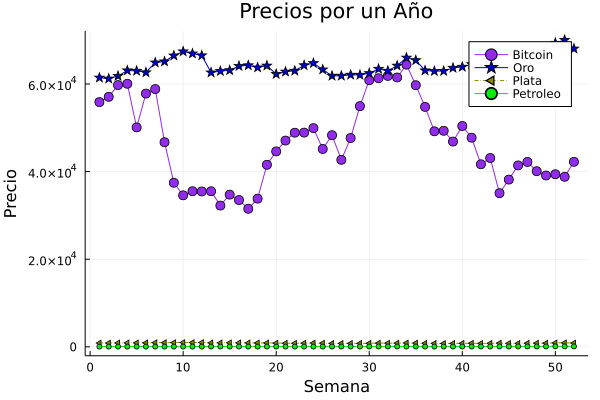

In [79]:
#Se grafican los datos de la base:
plot(datosBitcoin1.ÚltimoFloat,color="purple2",title="Precios por un Año",marker = (:circle,5), add_marker = true, label="Bitcoin",xlabel="Semana", ylabel="Precio")
plot!(datosOro.ÚltimoFloat,color="blue3",marker = (:star,5), add_marker = true, label="Oro")
plot!(datosPlata.ÚltimoFloat,color="yellow4", markershape = :ltriangle, linestyle = :dashdot, label="Plata")
plot!(datosPetroleo.ÚltimoFloat,color="green2",marker = (:circle,3), add_marker = true, label="Petroleo")

Observe que el precio del Bitcoin y del Oro son bastante altos pues corresponden a un rango de $35.000$ a $70.000$ dolares, mientras que en comparación, el precio del petroleo y la plata es bastante bajo dado que en su mayoría no pasan de los mil dolares. De esta manera se pasará a encontrar la relación de los precios del Bitcoin respecto a las materias primas.



$\large{\text{Relación entre el precio del Bitcoin y el precio del Oro:}}$

In [80]:
#Definimos la matriz de diseño:

N2 = size(datosBitcoin1.ÚltimoFloat,1);
A2 = datosOro.ÚltimoFloat
b2 = Array(datosBitcoin1.ÚltimoFloat); #Vector b
A2 = [ones(N2,1) A2 A2.^2]; #Matriz A
println(A2)

[1.0 61433.1984 3.774037865653763e9; 1.0 61207.444800000005 3.746351298945048e9; 1.0 61817.685 3.821426178759225e9; 1.0 63073.4394 3.978258757745473e9; 1.0 62985.254400000005 3.96714227183272e9; 1.0 62636.0418 3.923273732371347e9; 1.0 64875.9408 4.2088876946851044e9; 1.0 65119.3314 4.2405273219830265e9; 1.0 66473.853 4.418773132665609e9; 1.0 67408.614 4.543921241400996e9; 1.0 66939.46979999999 4.480892617105111e9; 1.0 66509.127 4.423463974302128e9; 1.0 62604.2952 3.9192977774887433e9; 1.0 62928.816 3.9600358831618557e9; 1.0 63115.7682 3.983600195476131e9; 1.0 64082.275799999996 4.106538071707265e9; 1.0 64237.4814 4.1264540166153455e9; 1.0 63757.755000000005 4.0650513226400256e9; 1.0 64166.933399999994 4.117395341960035e9; 1.0 62262.1374 3.876573753616479e9; 1.0 62798.3022 3.9436267592025247e9; 1.0 62999.364 3.968919864404496e9; 1.0 64251.59099999999 4.12826694603128e9; 1.0 64752.4818 4.192883899259331e9; 1.0 63288.6108 4.005448256993877e9; 1.0 61849.4316 3.825352189243079e9; 1.0 61863.

Solucionamos el problema de los mínimos cuadrados por medio de la descomposición QR, dando como resultado las siguientes constantes:

In [81]:
qrA2 = qr(A2);                    
constantes2 = qrA2\b2

println("[c,b,a]=",constantes2)

[c,b,a]=[656035.1013904216, -17.060688977616227, 0.00011771319764257382]


Con el cálculo de las constantes ya realizado, procedemos a encontrar la función que se ajusta a la mayoría de los datos $(ax^{2}+bx+c)$ y que se planteaba al inicio del problema para predecir la relación: 

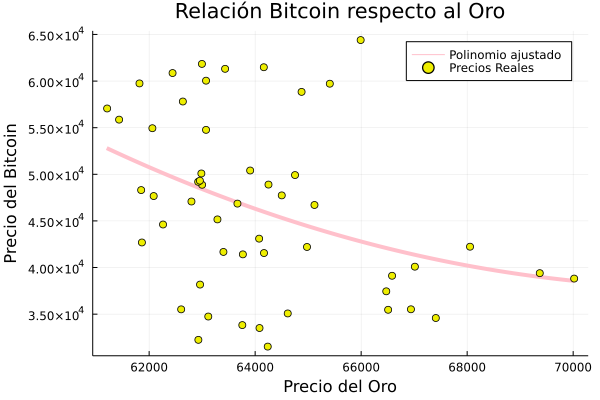

In [82]:
cons2=constantes2

#Valores que toma el oro:
vector=collect((61200:1:70018))

#Predicción:
function pred2(x)
    p=cons2[3].*(x.^2).+cons2[2].*x.+cons2[1]
    return p
end

plot(vector,pred2(vector),color="pink",linewidth=4,label="Polinomio ajustado", title= "Relación Bitcoin respecto al Oro" )
plot!(A2[:,2],b2,label="Precios Reales",color="yellow2", st=:scatter ,xlabel="Precio del Oro", ylabel="Precio del Bitcoin")

En la gráfica se observa que mientras el valor del oro aumenta el valor del Bitcoin disminuye, pues la función resultante nos es una parabola convexa en la cual tomando unicamente el ultimo año se puede ver un comportamiento decreciente, por tanto
predecimos que la relación es: 

$$\text{" Cuando el precio del oro aumente, el precio del Bitcoin será más bajo"}$$

Adicionalmente esta función nos daría una manera de predecir el valor del Bitcoin si tenemos con anterioridad el valor del Oro.

$\large{\text{Relación entre el precio del Bitcoin y el precio del Petroleo:}}$

In [83]:
#Definimos la matriz de diseño:

N3 = size(datosBitcoin1.ÚltimoFloat,1);
A3 = datosPetroleo.ÚltimoFloat
b3 = Array(datosBitcoin1.ÚltimoFloat);
A3 = [ones(N3,1) A3 A3.^2 ] # matriz de diseño del modelo escogido.
println(A3)

[1.0 60.97 3717.3408999999997; 1.0 61.45 3776.1025000000004; 1.0 59.32 3518.8624; 1.0 63.13 3985.3969; 1.0 62.14 3861.3796; 1.0 63.58 4042.4163999999996; 1.0 64.9 4212.010000000001; 1.0 65.37 4273.236900000001; 1.0 63.58 4042.4163999999996; 1.0 66.32 4398.3423999999995; 1.0 69.62 4846.9444; 1.0 70.91 5028.228099999999; 1.0 71.64 5132.2896; 1.0 74.05 5483.402499999999; 1.0 75.16 5649.0256; 1.0 74.56 5559.1936000000005; 1.0 71.81 5156.676100000001; 1.0 72.07 5194.084899999999; 1.0 73.95 5468.602500000001; 1.0 68.28 4662.1584; 1.0 68.44 4684.0336; 1.0 62.32 3883.7824; 1.0 68.74 4725.187599999999; 1.0 69.29 4801.1041000000005; 1.0 69.72 4860.8784; 1.0 71.97 5179.680899999999; 1.0 73.98 5473.040400000001; 1.0 75.88 5757.774399999999; 1.0 79.35 6296.422499999999; 1.0 82.28 6769.9984; 1.0 83.76 7015.737600000001; 1.0 83.57 6983.944899999999; 1.0 81.27 6604.812899999999; 1.0 80.79 6527.024100000001; 1.0 76.1 5791.209999999999; 1.0 68.15 4644.422500000001; 1.0 66.26 4390.387600000001; 1.0 71.67

Solucionamos el problema de los mínimos cuadrados por medio de la descomposición QR, dando como resultado las siguientes constantes:

In [84]:
qrA3 = qr(A3);                    
constantes3 = qrA3\b3

println("[c,b,a]=",constantes3)

[c,b,a]=[73245.72230715436, -502.46157589390975, 1.9278642871250828]


Con el cálculo de las constantes ya realizado, procedemos a encontrar la función que se ajusta a los datos $(ax^{2}+bx+c)$ y que nos planteabamos al inicio del problema para predecir la relación: 

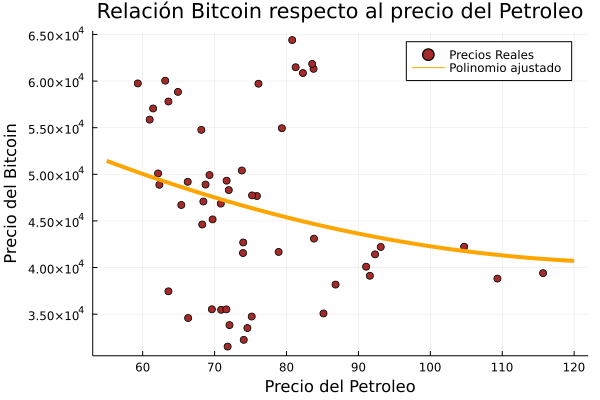

In [85]:
cons3=constantes3

#Valores que toma el petroleo:
vector2=(55:1:120)

#Predicción:
function pred3(x)
    return cons3[3].*x.^2 .+cons3[2].*x .+cons3[1]
end


plot(A3[:,2],b3,label="Precios Reales",color="brown",xlabel="Precio del Petroleo", ylabel="Precio del Bitcoin", st=:scatter)
plot!(vector2,pred3(vector2),color="orange",linewidth=4,label="Polinomio ajustado", title= "Relación Bitcoin respecto al precio del Petroleo")

Se puede predecir que mientras el valor del petroleo aumenta el valor del Bitcoin disminuye, pues la función resultante en el  rango determinado de los precios del petroleo tiene un comportamiento decreciente, así mismo esta función nos ayudaría a predecir el valor del Bitcoin si tenemos con anterioridad el valor del Petroleo.

$\large{\text{Relación entre el precio del Bitocoin y el precio de la Plata:}}$

In [86]:
#Matriz de diseño:

N4 = size(datosBitcoin1.ÚltimoFloat,1);
A4 = datosPlata.ÚltimoFloat
b4 = Array(datosBitcoin1.ÚltimoFloat);
A4 = [ones(N4,1) A4 A4.^2] # matriz de diseño del modelo escogido.
println(A4)

[1.0 885.8712360000001 784767.8467721678; 1.0 880.015752 774427.7237681255; 1.0 893.3140500000001 798009.9919274026; 1.0 920.82777 847923.7820031729; 1.0 919.7695500000001 845976.0251072027; 1.0 912.6442020000001 832919.4394442169; 1.0 969.223698 939394.5767647952; 1.0 965.27301 931751.9838344601; 1.0 969.541164 940010.0686904748; 1.0 988.165836 976471.7194375789; 1.0 984.003504 968262.8958842781; 1.0 992.8220040000001 985695.5316265762; 1.0 916.0305060000001 839111.8879226161; 1.0 920.1928379999999 846754.8591064941; 1.0 934.7962739999999 873844.073884283; 1.0 925.3781160000001 856324.6575717096; 1.0 909.8928300000001 827904.9620854091; 1.0 890.068842 792222.543499221; 1.0 901.1448780000001 812062.091145635; 1.0 858.075324 736293.2616577051; 1.0 838.780446 703552.6365919589; 1.0 815.2526879999999 664636.9452912252; 1.0 848.7629880000001 720398.6097986882; 1.0 874.865748 765390.0770235996; 1.0 843.0486 710730.9419619599; 1.0 787.915338 620810.5798556543; 1.0 791.0194500000001 625711.77

Solucionamos el problema de los mínimos cuadrados por medio de la descomposición QR, dando como resultado las siguientes constantes:

In [87]:
qrA4 = qr(A4);                    
constantes4 = qrA4\b4

println("[c,b,a]=",constantes4)

[c,b,a]=[-409040.99661557726, 1077.7645530691966, -0.6339914601985587]


Con el cálculo de las constantes ya realizado, procedemos a encontrar la función objetivo $(ax^{2}+bx+c)$ que nos planteabamos al inicio del problema para predecir la relación: 

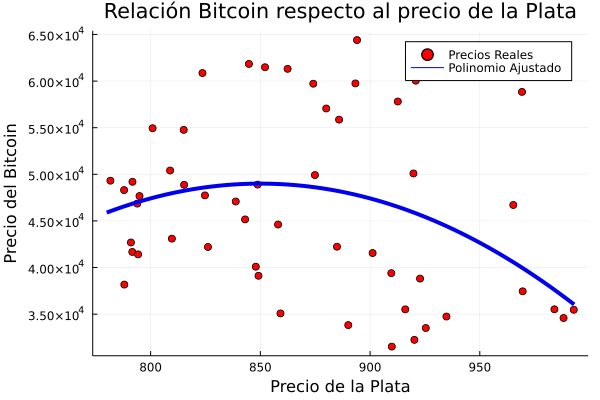

In [88]:
cons4=constantes4

#Valores que toma la Plata:
vector3=(780:1:993)

#Predicción:
function pred4(x)
    return cons4[3].*x.^2 .+cons4[2].*x.+cons4[1]
end

plot(A4[:,2],b4,label="Precios Reales",color="red",xlabel="Precio de la Plata", ylabel="Precio del Bitcoin", st=:scatter)
plot!(vector3,pred4(vector3),color="blue2",linewidth=4,label="Polinomio Ajustado", title= "Relación Bitcoin respecto al precio de la Plata")

Podemos ver que mientras el valor de la plata aumentaba en un rango de tiempo, el valor del Bitcoin también aumento, pero finalmente se encontró que al tener la plata valores más altos, el bitcoin disminuyo, pues la función que se ajusto a los datos ha dado como resultado una parabola concava, de igual manera, esta función nos daría una manera de predecir el valor del Bitcoin si tenemos con anterioridad el valor de la plata.